In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
# import the dataset from UCI machine learning laboratory site
dframe=pd.read_excel("Online Retail.xlsx")

In [3]:
dframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
dframe.shape

(541909, 8)

In [5]:
dframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Distribution of the quantity column

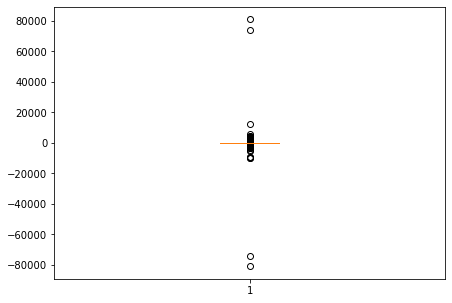

In [7]:
fig=plt.figure(figsize=(7,5))
plt.boxplot(dframe['Quantity'])
plt.show()

In [13]:
#filterout the negtive values
df=dframe[dframe.Quantity>0]

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


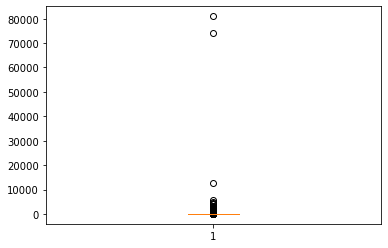

In [16]:
plt.boxplot(df['Quantity'])
plt.show()

# Time series Trends

## Number of orders

In [19]:
# Number of orders monthly
m_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [20]:
m_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

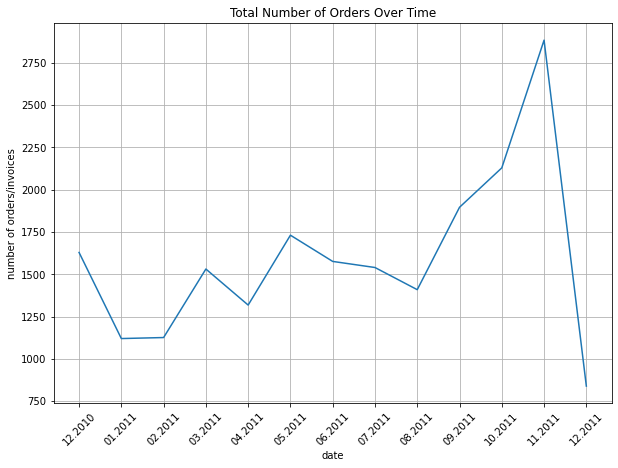

In [21]:
# Create a Line Chart for the data 
ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

In [22]:
# Get all invoice dates from December 1, 2011 
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

In [23]:
invoice_dates

516403   2011-12-01 08:33:00
516404   2011-12-01 08:33:00
516405   2011-12-01 08:33:00
516406   2011-12-01 08:33:00
516407   2011-12-01 08:33:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 25135, dtype: datetime64[ns]

In [24]:
# Print Min and Max dates in that series
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


- Number of orders/invoices are almost doubled over the period of one year from December 2010 to Nov 2011.For the month Dec 2011, we only have data of the first nine days as such we see sudden decline starting from Dec 2011.

In [25]:
# Remove the December 2011 data
df= df[df['InvoiceDate'] <= '2011-12-01']

In [26]:
# Recalculate the monthly distribution
m_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [27]:
m_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: InvoiceNo, dtype: int64

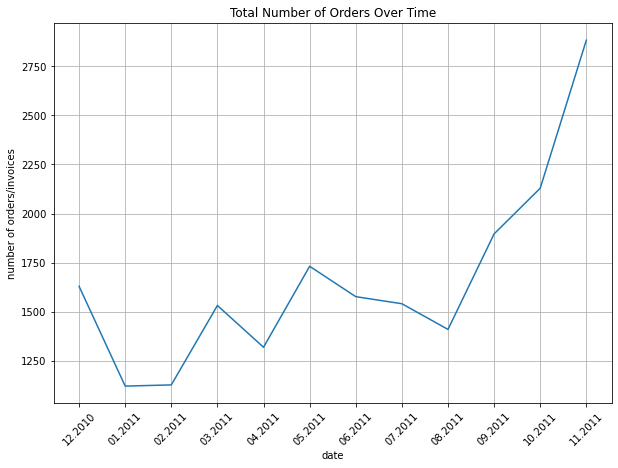

In [28]:
# Create a Line Chart for the data 
ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

## Sales

In [29]:
# Calculate sales
df['sales'] = df['UnitPrice'] * df['Quantity']
m_revenue_df = df.set_index('InvoiceDate')['sales'].resample('M').nunique()
m_revenue_df

<ipython-input-29-e7099ffdefc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sales'] = df['UnitPrice'] * df['Quantity']


InvoiceDate
2010-12-31    1449
2011-01-31    1405
2011-02-28    1101
2011-03-31    1340
2011-04-30    1159
2011-05-31    1296
2011-06-30    1435
2011-07-31    1372
2011-08-31    1376
2011-09-30    1497
2011-10-31    1693
2011-11-30    2027
Freq: M, Name: sales, dtype: int64

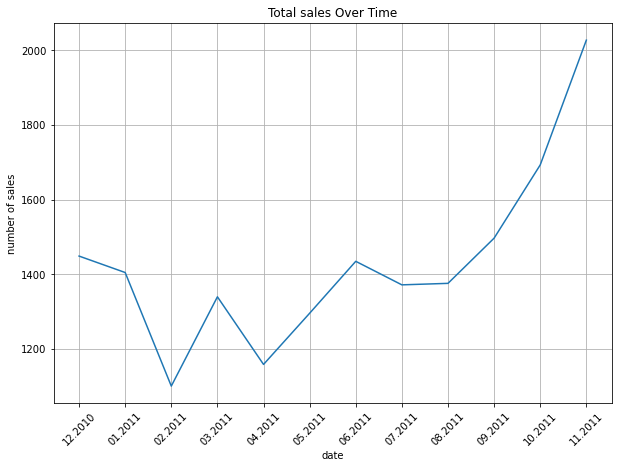

In [30]:
# Create a Line Plot for revenue

# Create a Line Chart for the data 
ax = pd.DataFrame(m_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of sales')
ax.set_title('Total sales Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

- the pattern is similar to order-month line, which shows that number of orders are directly related to revenue/sales.

## Calculate the repeat customers

In [31]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [32]:
# Aggregate the raw data for each Invoice No.
invoice_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

In [33]:
invoice_df.head()

,InvoiceNo,InvoiceDate,sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


In [34]:
# Aggregate by month
# Group by Month and CustomerID. 
# Filter selects customers who have more than one record in the group
# Basically customers with more than one order in a month

m_repeat_customers_df = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [35]:
m_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [36]:
# Calculate the unique customers
m_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [37]:
m_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [38]:
# Compare the repeat and unique customers by month and calculate percentage by month
m_repeat_percentage = (m_repeat_customers_df / m_unique_customers_df) * 100
m_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

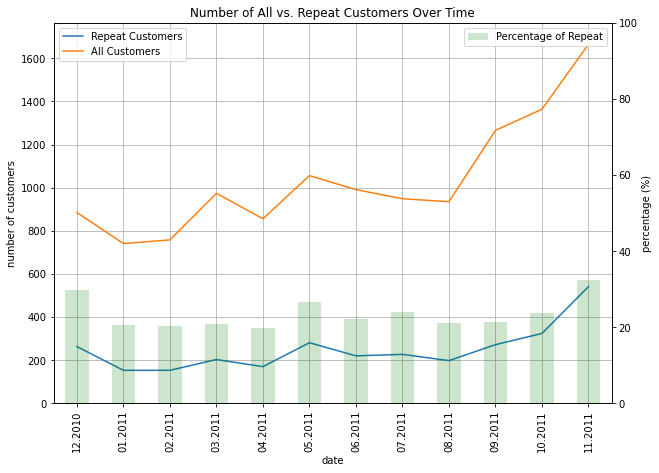

In [39]:
# Visualize thsese two in a dual axis chart

plot1 = pd.DataFrame(m_repeat_customers_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_unique_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_repeat_percentage.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('number of customers')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, m_unique_customers_df.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(m_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in m_repeat_customers_df.index], 
    rotation=45
)
plt.show()

- Over the mentioned period, the percentage of repeated customers are slightly changing ups and downs till 8th of August, then moving up reaching to the top in 11th of November. The percentage of the repeated customers are between 20% and 40% of the total number of customers. 

In [41]:
# Calculate Monthly revenue of repeat customers

m_repeat_revenue_df = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['sales']

m_repeat_revenue_df

InvoiceDate
2010-12-31     720
2011-01-31     394
2011-02-28     387
2011-03-31     542
2011-04-30     460
2011-05-31     755
2011-06-30     611
2011-07-31     593
2011-08-31     526
2011-09-30     741
2011-10-31     849
2011-11-30    1487
Freq: M, Name: sales, dtype: int64

In [42]:
# Calculate and show the % of revenue for repeat and all customers by month

m_repeat_revenue_percentage = (m_repeat_revenue_df/m_revenue_df) * 100

m_repeat_revenue_percentage

InvoiceDate
2010-12-31    49.689441
2011-01-31    28.042705
2011-02-28    35.149864
2011-03-31    40.447761
2011-04-30    39.689387
2011-05-31    58.256173
2011-06-30    42.578397
2011-07-31    43.221574
2011-08-31    38.226744
2011-09-30    49.498998
2011-10-31    50.147667
2011-11-30    73.359645
Freq: M, Name: sales, dtype: float64

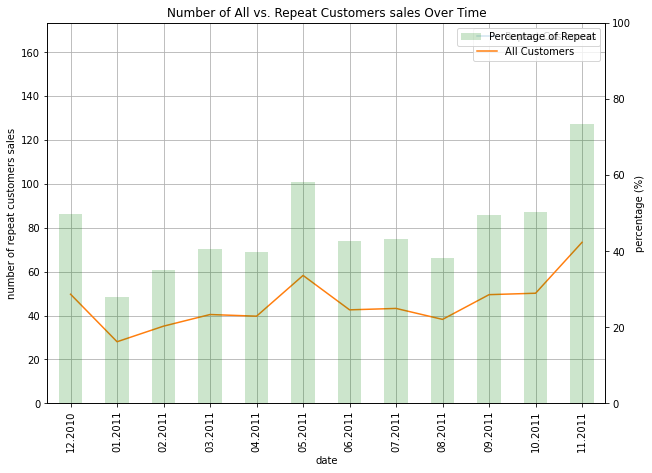

In [43]:
# Plot the  chart for Revenue and % (Dual axis chart)
plot1 = pd.DataFrame(m_repeat_revenue_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_repeat_revenue_percentage.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_repeat_revenue_percentage.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('number of repeat customers sales')
plot1.set_title('Number of All vs. Repeat Customers sales Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, m_repeat_revenue_percentage.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(m_repeat_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in m_repeat_revenue_df.index], 
    rotation=45
)
plt.show()

- The repeated customers are generating more orders than others which higly raise the sales of the company.

## Trending Items Over Time (How customers enagage with individual products)

## By Quantity

In [45]:
# Group the datafarme by month with stock code which is really the product ID
m_item_df = pd.DataFrame(df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
                        )
m_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

In [46]:
# Lets find out what items were sold the most by quantity on November 30, 2011
# Rank items by the last month sales by sorting by quantity
last_m_sorted_df = m_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()
last_m_sorted_df

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,84826,12551
2,2011-11-30,22197,12460
3,2011-11-30,22086,7908
4,2011-11-30,85099B,5909
...,...,...,...
2941,2011-11-30,84549,1
2942,2011-11-30,84527,1
2943,2011-11-30,90082B,1
2944,2011-11-30,90082D,1


## By Sales

In [47]:
# Group the datafarme by month with stock code which is really the product ID and 
# calculate the sales
m_revenue_df = pd.DataFrame(df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['sales'].sum()
                        )
m_revenue_df

sales
InvoiceDate StockCode          
2010-12-31  10002        234.41
            10120          3.36
            10125         90.86
            10133         85.27
            10135        279.02
...                         ...
2011-11-30  C2          1150.00
            DCGSSGIRL      3.29
            DOT        36905.40
            M           3312.42
            POST       10352.98

[31701 rows x 1 columns]

In [48]:
# Lets find out what items were sold the most by sales on November 30, 2011
last_m_revenue_sorted_df = m_revenue_df.loc['2011-11-30'].sort_values(
    by='sales', ascending=False
).reset_index()
last_m_revenue_sorted_df

,InvoiceDate,StockCode,sales
0,2011-11-30,DOT,36905.40
1,2011-11-30,23084,34556.72
2,2011-11-30,22086,28985.04
3,2011-11-30,22197,14195.60
4,2011-11-30,85123A,14136.70
...,...,...,...
2941,2011-11-30,84971L,0.00
2942,2011-11-30,46000U,0.00
2943,2011-11-30,22176,0.00
2944,2011-11-30,22848,0.00


In [49]:
# Use the top 5 items by quantity and find the monthly sales for those items 
m_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['sales'].sum()
)
m_item_df

sales
InvoiceDate StockCode          
2010-12-31  22086       9225.80
            22197       2630.79
            84826        119.10
            85099B      4019.15
2011-01-31  22086        143.32
            22197       1495.48
            84826        100.80
            85099B      5047.65
2011-02-28  22086         24.95
            22197       2127.00
            84826         17.70
            85099B      5617.24
2011-03-31  22086        232.01
            22197       3032.81
            84826         51.00
            85099B     10118.38
2011-04-30  22086         44.03
            22197       1495.57
            84826          0.85
            85099B      4878.08
2011-05-31  22086         65.19
            22197       5151.63
            23084       2279.57
            85099B      7122.73
2011-06-30  22086        910.88
            22197       1706.91
            23084       3326.87
            84826          3.40
            85099B      7247.98
2011-07-31  22086       1077.93
            22197       1540.00
            23084        668.59
            84826          1.70
            85099B      6253.87
2011-08-31  22086       1334.94
            22197       4133.35
            23084       3533.57
            84826         61.20
            85099B     10796.56
2011-09-30  22086       6006.10
            22197       3607.13
            23084        699.78
            85099B      8884.33
2011-10-31  22086      10031.39
            22197       4813.95
            23084      12256.87
            84826          9.35
            85099B     10485.81
2011-11-30  22086      28985.04
            22197      14195.60
            23084      34556.72
            84826          9.35
            85099B     11641.37

In [50]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
itmes_df = m_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
itmes_df = itmes_df.reset_index()
itmes_df = itmes_df.set_index('InvoiceDate')
itmes_df.columns = itmes_df.columns.droplevel(0)

In [51]:
itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,9225.80,2630.79,0.00,119.10,4019.15
2011-01-31,143.32,1495.48,0.00,100.80,5047.65
2011-02-28,24.95,2127.00,0.00,17.70,5617.24
2011-03-31,232.01,3032.81,0.00,51.00,10118.38
2011-04-30,44.03,1495.57,0.00,0.85,4878.08
2011-05-31,65.19,5151.63,2279.57,0.00,7122.73
2011-06-30,910.88,1706.91,3326.87,3.40,7247.98
2011-07-31,1077.93,1540.00,668.59,1.70,6253.87
2011-08-31,1334.94,4133.35,3533.57,61.20,10796.56


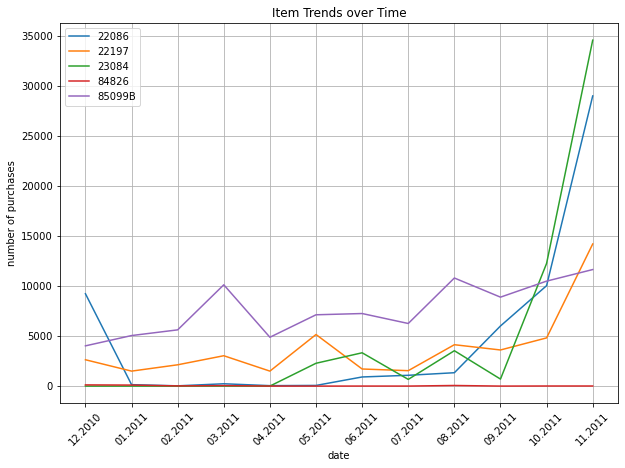

In [52]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('number of purchases')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(itmes_df.index)), 
    [x.strftime('%m.%Y') for x in itmes_df.index], 
    rotation=45
)

plt.show()

In [53]:
print(last_m_revenue_sorted_df.head())

  InvoiceDate StockCode     sales
0  2011-11-30       DOT  36905.40
1  2011-11-30     23084  34556.72
2  2011-11-30     22086  28985.04
3  2011-11-30     22197  14195.60
4  2011-11-30    85123A  14136.70


In [54]:
# Use the top 5 items by sales and find the monthly sales for those items 

revenue_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, '85123A', 22423, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['sales'].sum()
)
revenue_item_df

sales
InvoiceDate StockCode          
2010-12-31  22086       9225.80
            22423      27869.96
            85099B      4019.15
            85123A     10435.36
2011-01-31  22086        143.32
            22423      12800.60
            85099B      5047.65
            85123A     15223.21
2011-02-28  22086         24.95
            22423      11009.49
            85099B      5617.24
            85123A      5140.11
2011-03-31  22086        232.01
            22423      18372.00
            85099B     10118.38
            85123A      5597.90
2011-04-30  22086         44.03
            22423      14812.95
            85099B      4878.08
            85123A     10017.79
2011-05-31  22086         65.19
            22423      12645.97
            23084       2279.57
            85099B      7122.73
            85123A     11216.42
2011-06-30  22086        910.88
            22423       9745.39
            23084       3326.87
            85099B      7247.98
            85123A      4680.81
2011-07-31  22086       1077.93
            22423      13987.11
            23084        668.59
            85099B      6253.87
            85123A      8504.11
2011-08-31  22086       1334.94
            22423      10534.05
            23084       3533.57
            85099B     10796.56
            85123A      5620.57
2011-09-30  22086       6006.10
            22423       9619.53
            23084        699.78
            85099B      8884.33
            85123A      6957.46
2011-10-31  22086      10031.39
            22423      13281.24
            23084      12256.87
            85099B     10485.81
            85123A      4761.95
2011-11-30  22086      28985.04
            22423      13799.58
            23084      34556.72
            85099B     11641.37
            85123A     14136.70

In [55]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
revenue_df = revenue_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
revenue_df = revenue_df.reset_index()
revenue_df = revenue_df.set_index('InvoiceDate')
revenue_df.columns = revenue_df.columns.droplevel(0)
revenue_df

StockCode,22086,22423,23084,85099B,85123A
InvoiceDate,,,,,
2010-12-31,9225.80,27869.96,0.00,4019.15,10435.36
2011-01-31,143.32,12800.60,0.00,5047.65,15223.21
2011-02-28,24.95,11009.49,0.00,5617.24,5140.11
2011-03-31,232.01,18372.00,0.00,10118.38,5597.90
2011-04-30,44.03,14812.95,0.00,4878.08,10017.79
2011-05-31,65.19,12645.97,2279.57,7122.73,11216.42
2011-06-30,910.88,9745.39,3326.87,7247.98,4680.81
2011-07-31,1077.93,13987.11,668.59,6253.87,8504.11
2011-08-31,1334.94,10534.05,3533.57,10796.56,5620.57


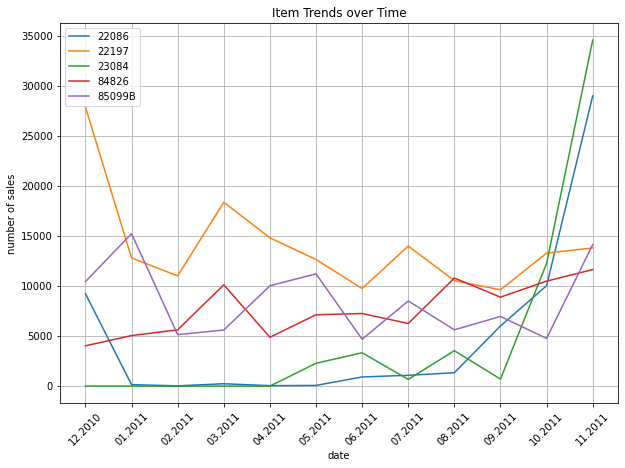

In [56]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(revenue_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('number of sales')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(revenue_df.index)), 
    [x.strftime('%m.%Y') for x in revenue_df.index], 
    rotation=45
)

plt.show()

In [57]:
# Drop NaN records
df = df[pd.notnull(df['CustomerID'])]

In [58]:
df.shape

(380620, 9)

In [59]:
 # Summarize the data for each order or InvoiceNo

orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
            'sales': sum,
            'InvoiceDate': max
        })

In [60]:
orders_df

sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]